In [ ]:
import pandas as pd
import os
#upload the file into colab Files to reference it; colab will not read from your local machine

In [ ]:
file_path = 'review_data.csv'

# Read the CSV file using pandas
df = pd.read_csv(file_path)

In [ ]:
df.head()

,review_summary_id,google_place_id,place_id,name,description,rating,review_count,raw_data,snapshot_date,city,...,name.1,building,street,borough,zipcode,active,google_place_id.1,city.1,lat,lng
0,93843,ChIJ93uz9TFu5kcRc8c4Y3tP3dI,46510,Bar Hemingway,NaN,4.5,493,"{""url"": ""https://maps.google.com/?cid=15194388...",2023-07-20 08:00:05.011552,Paris,...,Bar Hemingway,NaN,NaN,NaN,NaN,t,ChIJ93uz9TFu5kcRc8c4Y3tP3dI,Paris,48.868786,2.327511
1,95452,ChIJ32nhLwRu5kcR6FEtBPVddL4,46524,Les Enfants Rouges,NaN,4.5,998,"{""url"": ""https://maps.google.com/?cid=13723697...",2023-07-26 08:00:08.234194,Paris,...,Les Enfants Rouges,NaN,NaN,NaN,NaN,t,ChIJ32nhLwRu5kcR6FEtBPVddL4,Paris,48.863030,2.361253
2,95526,ChIJu0Sg-TBu5kcRUIDfQSE4_yw,46533,Harry's New York Bar,NaN,4.4,2081,"{""url"": ""https://maps.google.com/?cid=32423719...",2023-07-26 08:00:11.959373,Paris,...,Harry's Bar,5,Rue Daunou,NaN,75002,t,ChIJu0Sg-TBu5kcRUIDfQSE4_yw,Paris,48.869209,2.332171
3,93228,ChIJ1dIfiAJu5kcRH50cnqxdMAE,46546,STOLLY'S,NaN,4.3,386,"{""url"": ""https://maps.google.com/?cid=85671388...",2023-07-18 08:00:02.087258,Paris,...,Stolly's,16,Rue Cloche Perce,NaN,75001,t,ChIJ1dIfiAJu5kcRH50cnqxdMAE,Paris,48.856392,2.357352
4,96192,ChIJp4gg3klu5kcRkHvCczvvaTs,46527,Lémoni Café - Trinité,NaN,4.3,320,"{""url"": ""https://maps.google.com/?cid=42812159...",2023-07-29 08:00:08.118691,Paris,...,Lémoni Café - Trinité,5,Rue de Clichy,NaN,75009,t,ChIJp4gg3klu5kcRkHvCczvvaTs,Paris,48.876851,2.330703


In [ ]:
df.columns.tolist()

['review_summary_id',
 'google_place_id',
 'place_id',
 'name',
 'description',
 'rating',
 'review_count',
 'raw_data',
 'snapshot_date',
 'city',
 'url',
 'price_level',
 'location',
 'weighted_rating',
 'id',
 'name.1',
 'building',
 'street',
 'borough',
 'zipcode',
 'active',
 'google_place_id.1',
 'city.1',
 'lat',
 'lng']

In [ ]:
row_counts = df['city'].value_counts()
print(row_counts)

city
New York     31725
Paris        13689
Barcelona     9007
Name: count, dtype: int64


In [ ]:
ny_df = df[df['city'] == 'New York']
len(ny_df)

31725

In [ ]:
key_columns = ['name', 'rating', 'review_count', 'borough']

filtered_ny_df = ny_df[key_columns]

In [ ]:
filtered_ny_df.head()

,name,rating,review_count,borough
7,Sound Of Brazil,3.8,352,Manhattan
23,Lucky Louie's,4.7,57,Manhattan
59,Tov-Li Shawarma,4.5,222,Queens
60,Fishnet,4.4,371,Queens
77,Las Palmitas Deli,4.3,90,Queens


In [ ]:
filtered_ny_df.to_csv('exported_data.csv', index=False)

<ipython-input-63-29344a43a643>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(filtered_ny_df, x='rating', y='borough', inner='box', palette='Dark2')


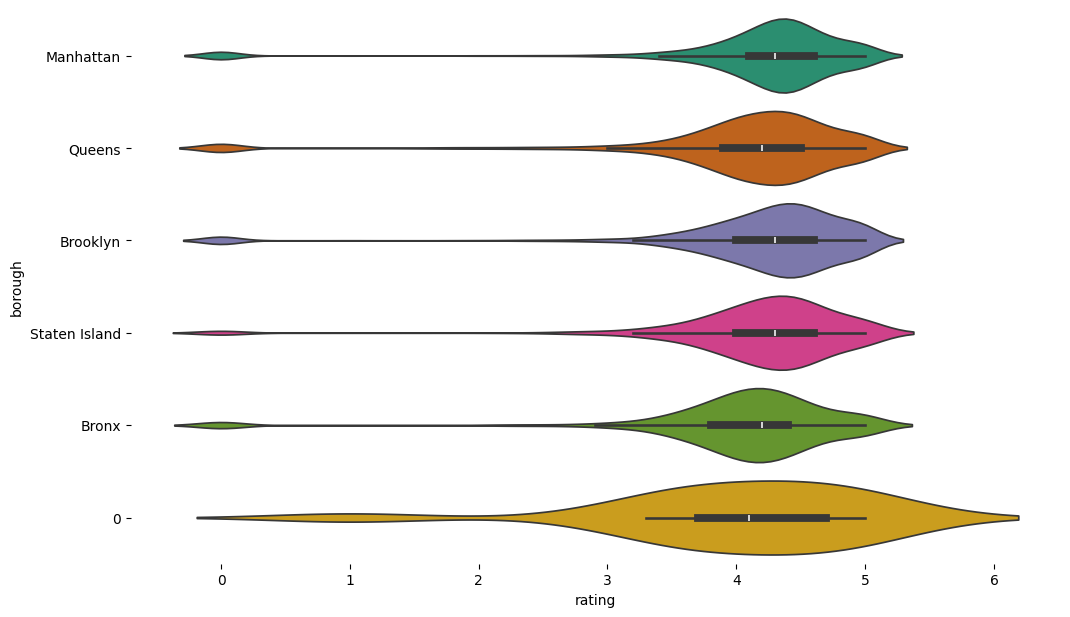

In [ ]:
# @title borough vs rating

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtered_ny_df['borough'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtered_ny_df, x='rating', y='borough', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)